In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
import shap
from sklearn.linear_model import Lasso
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.inspection import PartialDependenceDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statistics as st
import scipy.stats as stats
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, Matern as M, DotProduct as DP, WhiteKernel as WK
from sklearn.inspection import PartialDependenceDisplay
from scipy.optimize import curve_fit



In [4]:
df = pd.read_csv('XMMCTY.csv')

In [5]:
df.corr(numeric_only= True)

,source_number,ra,dec,lii,bii,redshift,log_lx,log_l_bol,hardxray_bc,log_stellar_mass,sfr,abs_umag,abs_vmag,abs_jmag,morph_class
source_number,1.000000,-0.117398,-0.023349,-0.045952,-0.116049,-0.003852,-0.110515,-0.027498,0.153563,0.059448,-0.108683,0.003786,-0.032973,-0.001196,0.014286
ra,-0.117398,1.000000,-0.129567,0.644795,0.786021,0.006980,-0.016305,-0.063621,-0.097187,0.014832,-0.018288,-0.058708,-0.052464,-0.023448,0.016236
dec,-0.023349,-0.129567,1.000000,-0.841448,0.511138,0.079668,-0.056247,-0.026737,0.029218,-0.142162,0.084388,-0.006230,0.061404,0.073343,-0.144218
lii,-0.045952,0.644795,-0.841448,1.000000,0.034310,-0.057512,0.034538,-0.013738,-0.075533,0.117757,-0.074921,-0.027412,-0.076078,-0.069497,0.119255
bii,-0.116049,0.786021,0.511138,0.034310,1.000000,0.055751,-0.049193,-0.071434,-0.065520,-0.075982,0.036873,-0.054806,-0.007173,0.025388,-0.076702
redshift,-0.003852,0.006980,0.079668,-0.057512,0.055751,1.000000,0.756398,0.716706,0.160297,0.238749,0.547670,-0.577991,-0.510242,-0.533584,-0.086958
log_lx,-0.110515,-0.016305,-0.056247,0.034538,-0.049193,0.756398,1.000000,0.904662,0.082977,0.400857,0.343759,-0.597995,-0.581193,-0.632496,0.049148
log_l_bol,-0.027498,-0.063621,-0.026737,-0.013738,-0.071434,0.716706,0.904662,1.000000,0.421329,0.427892,0.443775,-0.630971,-0.609221,-0.675468,0.008375
hardxray_bc,0.153563,-0.097187,0.029218,-0.075533,-0.065520,0.160297,0.082977,0.421329,1.000000,0.109073,0.243508,-0.142293,-0.128091,-0.158809,-0.010720
log_stellar_mass,0.059448,0.014832,-0.142162,0.117757,-0.075982,0.238749,0.400857,0.427892,0.109073,1.000000,0.053493,-0.604315,-0.819642,-0.855858,-0.018024


##### Data Analysis
- Thing that we would need to do
    - Split the varables by the properties of the host galaxy and the properties of the AGN
    - See which varables have the most correlation to effect the AGN
    - Find the varables that have the most correlation to redshift, as thats our primary variable, eg like if the properties of the AGN or the host galaxy effect the AGN
    - Take a look at the classifaction, see if some types of AGNs have a certain property, or that they are more inclined to have a certain property.


##### Data Wrangeling
- Need to convert all of the luminosity into one value,chat gave this formula: https://chatgpt.com/share/b016490f-046a-4154-8413-bdbeb633b6fb

In [6]:

#compute the mean for the log_l_lbol and hardxray_bc and replace all of the NaN
mean_l_bol = df['log_l_bol'].astype(float).mean(axis = 0)
df['log_l_bol'].replace(np.nan,mean_l_bol,inplace=True)

mean_hardxray = df['hardxray_bc'].astype(float).mean(axis = 0)
df['hardxray_bc'].replace(np.nan,mean_hardxray,inplace=True)


<ipython-input-6-94603d9d0b67>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['log_l_bol'].replace(np.nan,mean_l_bol,inplace=True)
<ipython-input-6-94603d9d0b67>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [7]:
df["M-Combined"] = -2.5 * np.log((10 ** (-0.4 * df["abs_umag"])) + (10 ** (-0.4 * df["abs_vmag"])) + (10 ** (-0.4 * df["abs_jmag"])) )

In [8]:
print(df["M-Combined"])

0     -56.630833
1     -54.218336
2     -53.878212
3     -53.687375
4     -56.702639
         ...    
250   -48.088943
251   -50.438637
252   -55.286184
253   -53.978835
254   -54.809129
Name: M-Combined, Length: 255, dtype: float64


##### Remove the uncessary variables
- Alt_Name
- RA
- DEC
- Name
- LII
- BII

In [9]:
df.head()

,source_number,alt_name,name,ra,dec,lii,bii,redshift,log_lx,log_l_bol,hardxray_bc,log_stellar_mass,sfr,abs_umag,abs_vmag,abs_jmag,morph_class,M-Combined
0,2050,XMMC 2050,XMMU J100015.3+013146,150.06402,1.529659,237.516675,41.682190,1.031,44.77,45.72,8.89,11.45,0.00,-20.77,-22.96,-24.28,99,-56.630833
1,5500,XMMC 5500,XMMU J095849.0+013219,149.70425,1.538820,237.225342,41.396053,0.364,44.44,45.13,4.86,10.84,5.60,-20.51,-22.02,-23.15,99,-54.218336
2,2668,XMMC 2668,XMMU J100059.4+013232,150.24772,1.542418,237.647480,41.838279,0.886,44.05,45.37,20.74,10.76,0.42,-19.58,-21.71,-23.10,99,-53.878212
3,60183,XMMC 60183,XMMU J100026.6+013235,150.11115,1.543309,237.538922,41.728343,0.285,42.45,44.17,52.31,10.77,0.74,-20.04,-21.84,-22.92,99,-53.687375
4,2544,XMMC 2544,XMMU J100055.4+013416,150.23109,1.571185,237.603127,41.841745,0.826,44.09,44.86,5.97,11.31,2.54,-21.34,-23.15,-24.23,99,-56.702639


In [10]:
#df.drop(['AREA','REG','DEV','Type','Coverage'],axis = 1,inplace = True)
#df.drop(columns=['alt_name','ra',"dec","name","lii","bii"],axis = 1, inplace=True)
df.drop(columns=['source_number'],axis=1,inplace=True)

In [11]:
df.head()

,alt_name,name,ra,dec,lii,bii,redshift,log_lx,log_l_bol,hardxray_bc,log_stellar_mass,sfr,abs_umag,abs_vmag,abs_jmag,morph_class,M-Combined
0,XMMC 2050,XMMU J100015.3+013146,150.06402,1.529659,237.516675,41.682190,1.031,44.77,45.72,8.89,11.45,0.00,-20.77,-22.96,-24.28,99,-56.630833
1,XMMC 5500,XMMU J095849.0+013219,149.70425,1.538820,237.225342,41.396053,0.364,44.44,45.13,4.86,10.84,5.60,-20.51,-22.02,-23.15,99,-54.218336
2,XMMC 2668,XMMU J100059.4+013232,150.24772,1.542418,237.647480,41.838279,0.886,44.05,45.37,20.74,10.76,0.42,-19.58,-21.71,-23.10,99,-53.878212
3,XMMC 60183,XMMU J100026.6+013235,150.11115,1.543309,237.538922,41.728343,0.285,42.45,44.17,52.31,10.77,0.74,-20.04,-21.84,-22.92,99,-53.687375
4,XMMC 2544,XMMU J100055.4+013416,150.23109,1.571185,237.603127,41.841745,0.826,44.09,44.86,5.97,11.31,2.54,-21.34,-23.15,-24.23,99,-56.702639


In [12]:
df.corr(numeric_only=True)

,ra,dec,lii,bii,redshift,log_lx,log_l_bol,hardxray_bc,log_stellar_mass,sfr,abs_umag,abs_vmag,abs_jmag,morph_class,M-Combined
ra,1.000000,-0.129567,0.644795,0.786021,0.006980,-0.016305,-0.061989,-0.094692,0.014832,-0.018288,-0.058708,-0.052464,-0.023448,0.016236,-0.032916
dec,-0.129567,1.000000,-0.841448,0.511138,0.079668,-0.056247,-0.026137,0.028562,-0.142162,0.084388,-0.006230,0.061404,0.073343,-0.144218,0.065287
lii,0.644795,-0.841448,1.000000,0.034310,-0.057512,0.034538,-0.013359,-0.073445,0.117757,-0.074921,-0.027412,-0.076078,-0.069497,0.119255,-0.068442
bii,0.786021,0.511138,0.034310,1.000000,0.055751,-0.049193,-0.070045,-0.064245,-0.075982,0.036873,-0.054806,-0.007173,0.025388,-0.076702,0.012165
redshift,0.006980,0.079668,-0.057512,0.055751,1.000000,0.756398,0.686984,0.153649,0.238749,0.547670,-0.577991,-0.510242,-0.533584,-0.086958,-0.539169
log_lx,-0.016305,-0.056247,0.034538,-0.049193,0.756398,1.000000,0.815255,0.074777,0.400857,0.343759,-0.597995,-0.581193,-0.632496,0.049148,-0.627347
log_l_bol,-0.061989,-0.026137,-0.013359,-0.070045,0.686984,0.815255,1.000000,0.421329,0.418932,0.442698,-0.619588,-0.596561,-0.660029,0.008344,-0.654189
hardxray_bc,-0.094692,0.028562,-0.073445,-0.064245,0.153649,0.074777,0.421329,1.000000,0.106789,0.242917,-0.139726,-0.125429,-0.155179,-0.010682,-0.153816
log_stellar_mass,0.014832,-0.142162,0.117757,-0.075982,0.238749,0.400857,0.418932,0.106789,1.000000,0.053493,-0.604315,-0.819642,-0.855858,-0.018024,-0.837896
sfr,-0.018288,0.084388,-0.074921,0.036873,0.547670,0.343759,0.442698,0.242917,0.053493,1.000000,-0.318675,-0.246807,-0.324133,-0.047763,-0.313198


##### Graph the variables that we hypothesized to have the greatest effect on redshift
- Variables
    - Star formation rate (SFR)
    - Luminosity (Log_Lx)
    - Magnitude (abs_umag,abs_vmag,abs_jmag)

R² Score: 0.299942808070487


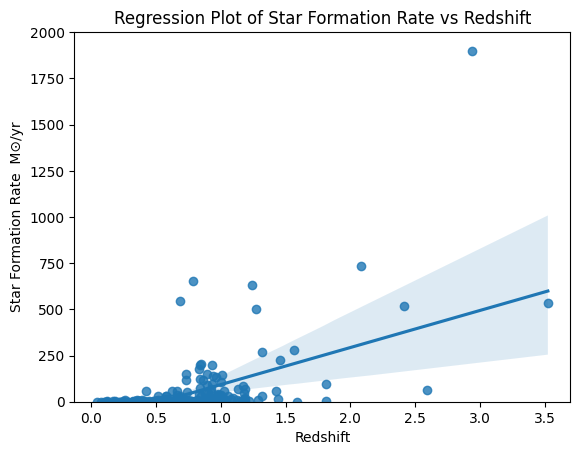

In [13]:
# Stellar mass
sns.regplot(x="redshift", y="sfr", data=df)
plt.xlabel("Redshift")
plt.ylabel("Star Formation Rate  M⊙/yr" )
plt.ylim(0,)
plt.title("Regression Plot of Star Formation Rate vs Redshift")

# Fit a linear regression model
X = df[["redshift"]].values.reshape(-1, 1)  # Reshape for sklearn
y = df["sfr"].values
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate and print the R² value
r2 = r2_score(y, y_pred)
print(f'R² Score: {r2}')

# Show the plot
plt.show()

R² Score: 0.5721375518106532


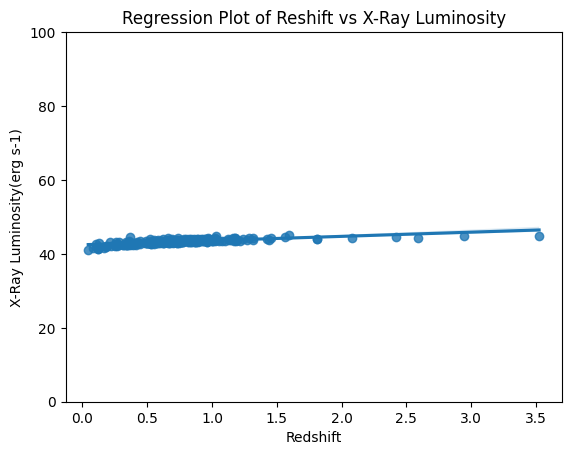

In [14]:
# Stellar mass
sns.regplot(x="redshift", y="log_lx", data=df)
plt.xlabel("Redshift")
plt.ylabel("X-Ray Luminosity(erg s-1)")
plt.ylim(0,100)
plt.title("Regression Plot of Reshift vs X-Ray Luminosity")

# Fit a linear regression model
X = df[["redshift"]].values.reshape(-1, 1)  # Reshape for sklearn
y = df["log_lx"].values
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate and print the R² value
r2 = r2_score(y, y_pred)
print(f'R² Score: {r2}')

# Show the plot
plt.show()

R² Score: 0.4719472281921252


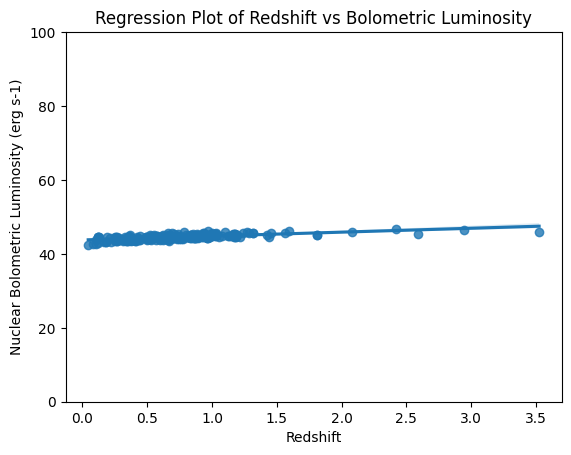

In [15]:
# Bolometric luminosity
sns.regplot(x="redshift", y="log_l_bol", data=df)
plt.xlabel("Redshift")
plt.ylabel("Nuclear Bolometric Luminosity (erg s-1)")
plt.ylim(0,100)
plt.title("Regression Plot of Redshift vs Bolometric Luminosity")

# Fit a linear regression model
X = df[["redshift"]].values.reshape(-1, 1)  # Reshape for sklearn
y = df["log_l_bol"].values
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate and print the R² value
r2 = r2_score(y, y_pred)
print(f'R² Score: {r2}')
# Show the plot
plt.show()

#### All types of magnitude
- Magnitude (abs_umag,abs_vmag,abs_jmag)

R² Score: 0.33407324945038264


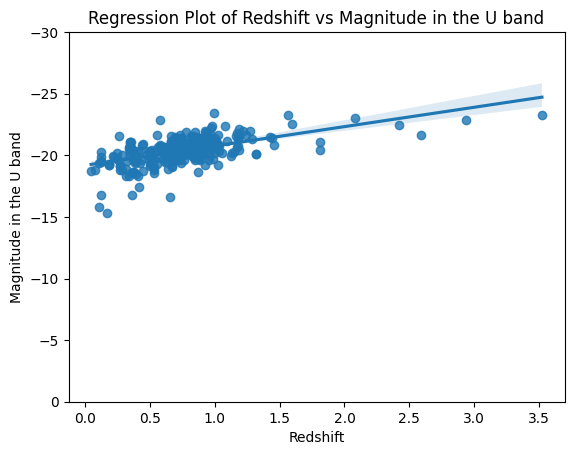

In [16]:
# Stellar mass
sns.regplot(x="redshift", y="abs_umag", data=df)
plt.xlabel("Redshift")
plt.ylabel("Magnitude in the U band")
plt.ylim(0,-30)
plt.title("Regression Plot of Redshift vs Magnitude in the U band")

# Fit a linear regression model
X = df[["redshift"]].values.reshape(-1, 1)  # Reshape for sklearn
y = df["abs_umag"].values
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate and print the R² value
r2 = r2_score(y, y_pred)
print(f'R² Score: {r2}')

# Show the plot
plt.show()

R² Score: 0.2603466387017733


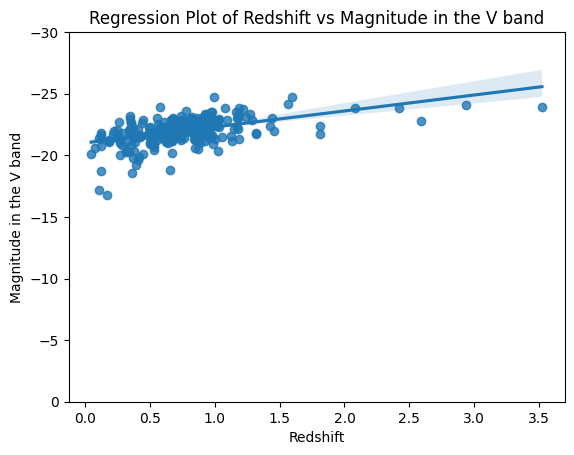

In [17]:
# Stellar mass
sns.regplot(x="redshift", y="abs_vmag", data=df)
plt.xlabel("Redshift")
plt.ylabel("Magnitude in the V band")
plt.ylim(0,-30)
plt.title("Regression Plot of Redshift vs Magnitude in the V band")

# Fit a linear regression model
X = df[["redshift"]].values.reshape(-1, 1)  # Reshape for sklearn
y = df["abs_vmag"].values
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate and print the R² value
r2 = r2_score(y, y_pred)
print(f'R² Score: {r2}')

# Show the plot
plt.show()

R² Score: 0.28471168860237583


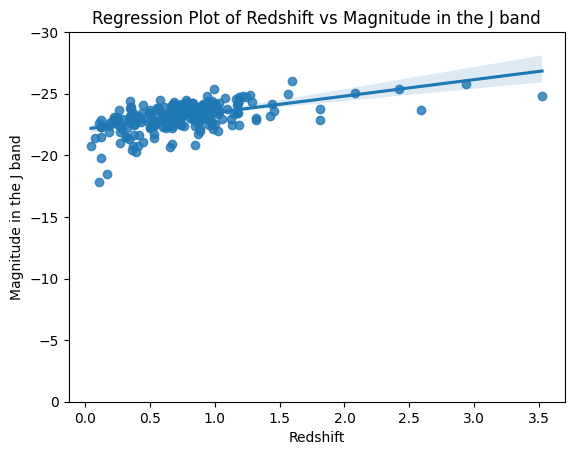

In [18]:
# Stellar mass
sns.regplot(x="redshift", y="abs_jmag", data=df)
plt.xlabel("Redshift")
plt.ylabel("Magnitude in the J band")
plt.ylim(0,-30)
plt.title("Regression Plot of Redshift vs Magnitude in the J band")

# Fit a linear regression model
X = df[["redshift"]].values.reshape(-1, 1)  # Reshape for sklearn
y = df["abs_jmag"].values
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate and print the R² value
r2 = r2_score(y, y_pred)
print(f'R² Score: {r2}')

# Show the plot
plt.show()

### Analyizing data of AGN mergers, identifiying and confirming trends

In [19]:
df_merger = df[df["morph_class"] == 23]

In [20]:
df_merger.head()

,alt_name,name,ra,dec,lii,bii,redshift,log_lx,log_l_bol,hardxray_bc,log_stellar_mass,sfr,abs_umag,abs_vmag,abs_jmag,morph_class,M-Combined
48,XMMC 2422,XMMU J100159.4+015140,150.497760,1.861211,237.497776,42.227803,0.832,43.49,44.52,10.63,10.23,42.81,-20.96,-21.94,-22.98,23,-53.991731
60,XMMC 60205,XMMU J100152.2+015608,150.467600,1.935723,237.392370,42.247055,0.969,44.22,46.12,80.19,11.13,13.97,-20.77,-22.60,-23.59,23,-55.291769
109,XMMC 217,XMMU J095932.5+021037,149.885430,2.177204,236.671374,41.914720,0.660,43.48,45.23,55.51,11.12,13.81,-21.09,-22.83,-23.68,23,-55.619454
126,XMMC 117,XMMU J100013.4+021400,150.055910,2.233473,236.742471,42.086170,0.936,43.47,45.59,132.11,11.24,199.40,-21.81,-23.34,-24.80,23,-57.806311
138,XMMC 5119,XMMU J100241.7+021616,150.674026,2.271118,237.187098,42.610494,0.387,42.71,43.77,11.56,10.64,3.49,-19.41,-21.08,-22.52,23,-52.552982


R² Score: 0.1310839348003221


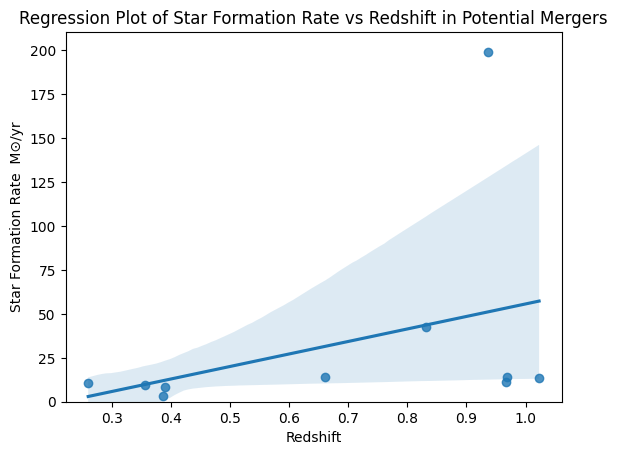

In [21]:
# Stellar mass
sns.regplot(x="redshift", y="sfr", data=df_merger)
plt.xlabel("Redshift")
plt.ylabel("Star Formation Rate  M⊙/yr" )
plt.ylim(0,)
plt.title("Regression Plot of Star Formation Rate vs Redshift in Potential Mergers")

# Fit a linear regression model
X = df_merger[["redshift"]].values.reshape(-1, 1)  # Reshape for sklearn
y = df_merger["sfr"].values
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate and print the R² value
r2 = r2_score(y, y_pred)
print(f'R² Score: {r2}')

# Show the plot
plt.show()

R² Score: 0.564158920775244


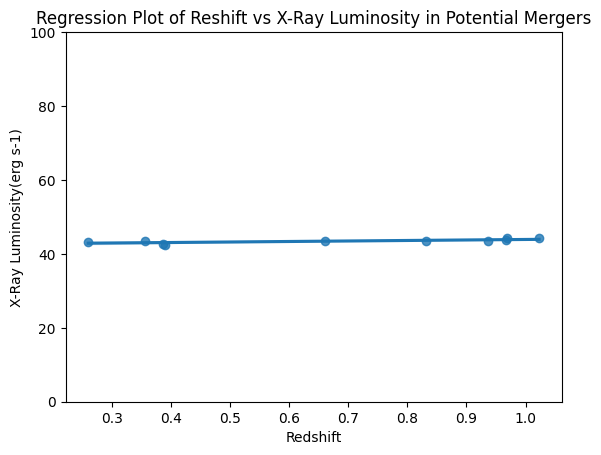

In [22]:
# Stellar mass
sns.regplot(x="redshift", y="log_lx", data=df_merger)
plt.xlabel("Redshift")
plt.ylabel("X-Ray Luminosity(erg s-1)")
plt.ylim(0,100)
plt.title("Regression Plot of Reshift vs X-Ray Luminosity in Potential Mergers")

# Fit a linear regression model
X = df_merger[["redshift"]].values.reshape(-1, 1)  # Reshape for sklearn
y = df_merger["log_lx"].values
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate and print the R² value
r2 = r2_score(y, y_pred)
print(f'R² Score: {r2}')

# Show the plot
plt.show()

R² Score: 0.5124612016391504


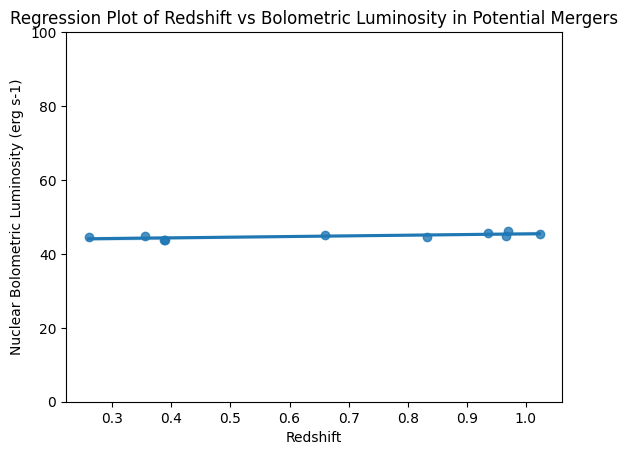

In [23]:
# Bolometric luminosity
sns.regplot(x="redshift", y="log_l_bol", data=df_merger)
plt.xlabel("Redshift")
plt.ylabel("Nuclear Bolometric Luminosity (erg s-1)")
plt.ylim(0,100)
plt.title("Regression Plot of Redshift vs Bolometric Luminosity in Potential Mergers")

# Fit a linear regression model
X = df_merger[["redshift"]].values.reshape(-1, 1)  # Reshape for sklearn
y = df_merger["log_l_bol"].values
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate and print the R² value
r2 = r2_score(y, y_pred)
print(f'R² Score: {r2}')
# Show the plot
plt.show()

R² Score: 0.28001738403339305


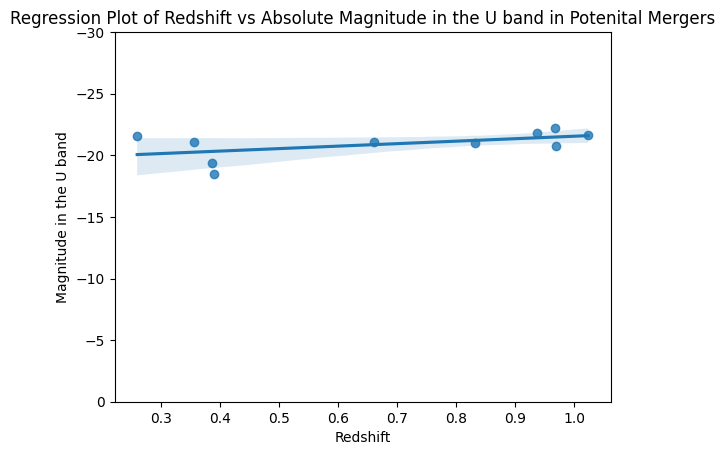

In [24]:
# Stellar mass
sns.regplot(x="redshift", y="abs_umag", data=df_merger)
plt.xlabel("Redshift")
plt.ylabel("Magnitude in the U band")
plt.ylim(0,-30)
plt.title("Regression Plot of Redshift vs Absolute Magnitude in the U band in Potenital Mergers")

# Fit a linear regression model
X = df_merger[["redshift"]].values.reshape(-1, 1)  # Reshape for sklearn
y = df_merger["abs_umag"].values
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate and print the R² value
r2 = r2_score(y, y_pred)
print(f'R² Score: {r2}')

# Show the plot
plt.show()

R² Score: 0.26419955322640587


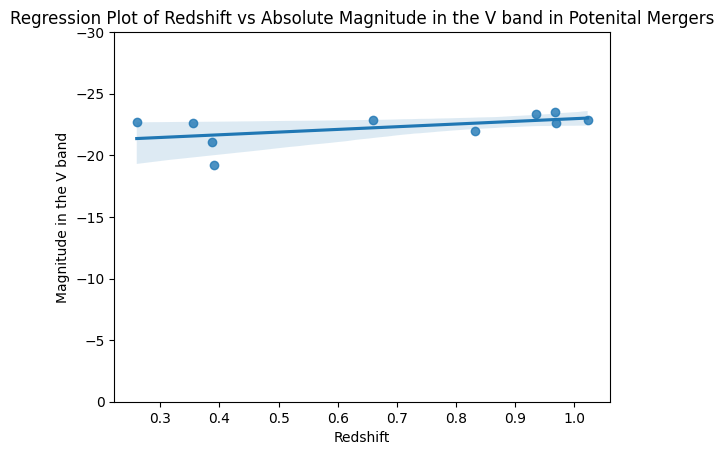

In [25]:
# Stellar mass
sns.regplot(x="redshift", y="abs_vmag", data=df_merger)
plt.xlabel("Redshift")
plt.ylabel("Magnitude in the V band")
plt.ylim(0,-30)
plt.title("Regression Plot of Redshift vs Absolute Magnitude in the V band in Potenital Mergers")

# Fit a linear regression model
X = df_merger[["redshift"]].values.reshape(-1, 1)  # Reshape for sklearn
y = df_merger["abs_vmag"].values
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate and print the R² value
r2 = r2_score(y, y_pred)
print(f'R² Score: {r2}')

# Show the plot
plt.show()

R² Score: 0.20239435541574025


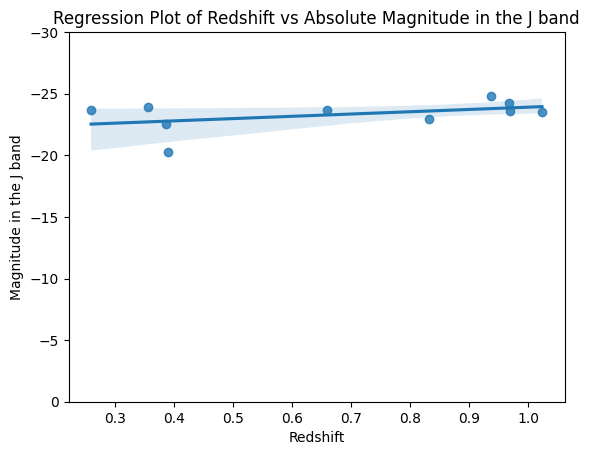

In [26]:
# Stellar mass
sns.regplot(x="redshift", y="abs_jmag", data=df_merger)
plt.xlabel("Redshift")
plt.ylabel("Magnitude in the J band")
plt.ylim(0,-30)
plt.title("Regression Plot of Redshift vs Absolute Magnitude in the J band")

# Fit a linear regression model
X = df_merger[["redshift"]].values.reshape(-1, 1)  # Reshape for sklearn
y = df_merger["abs_jmag"].values
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate and print the R² value
r2 = r2_score(y, y_pred)
print(f'R² Score: {r2}')

# Show the plot
plt.show()

In [27]:
df["U-V"] = df["abs_umag"] - df["abs_vmag"]

In [28]:
print(df["U-V"])

0      2.19
1      1.51
2      2.13
3      1.80
4      1.81
       ... 
250    2.21
251    1.74
252    1.13
253    1.94
254    1.91
Name: U-V, Length: 255, dtype: float64


In [29]:
print(min(df["redshift"]))

0.045


In [30]:
print(max(df["redshift"]))

3.524


In [31]:
print(max(df["U-V"]),min(df["U-V"]))

2.4200000000000017 0.5199999999999996


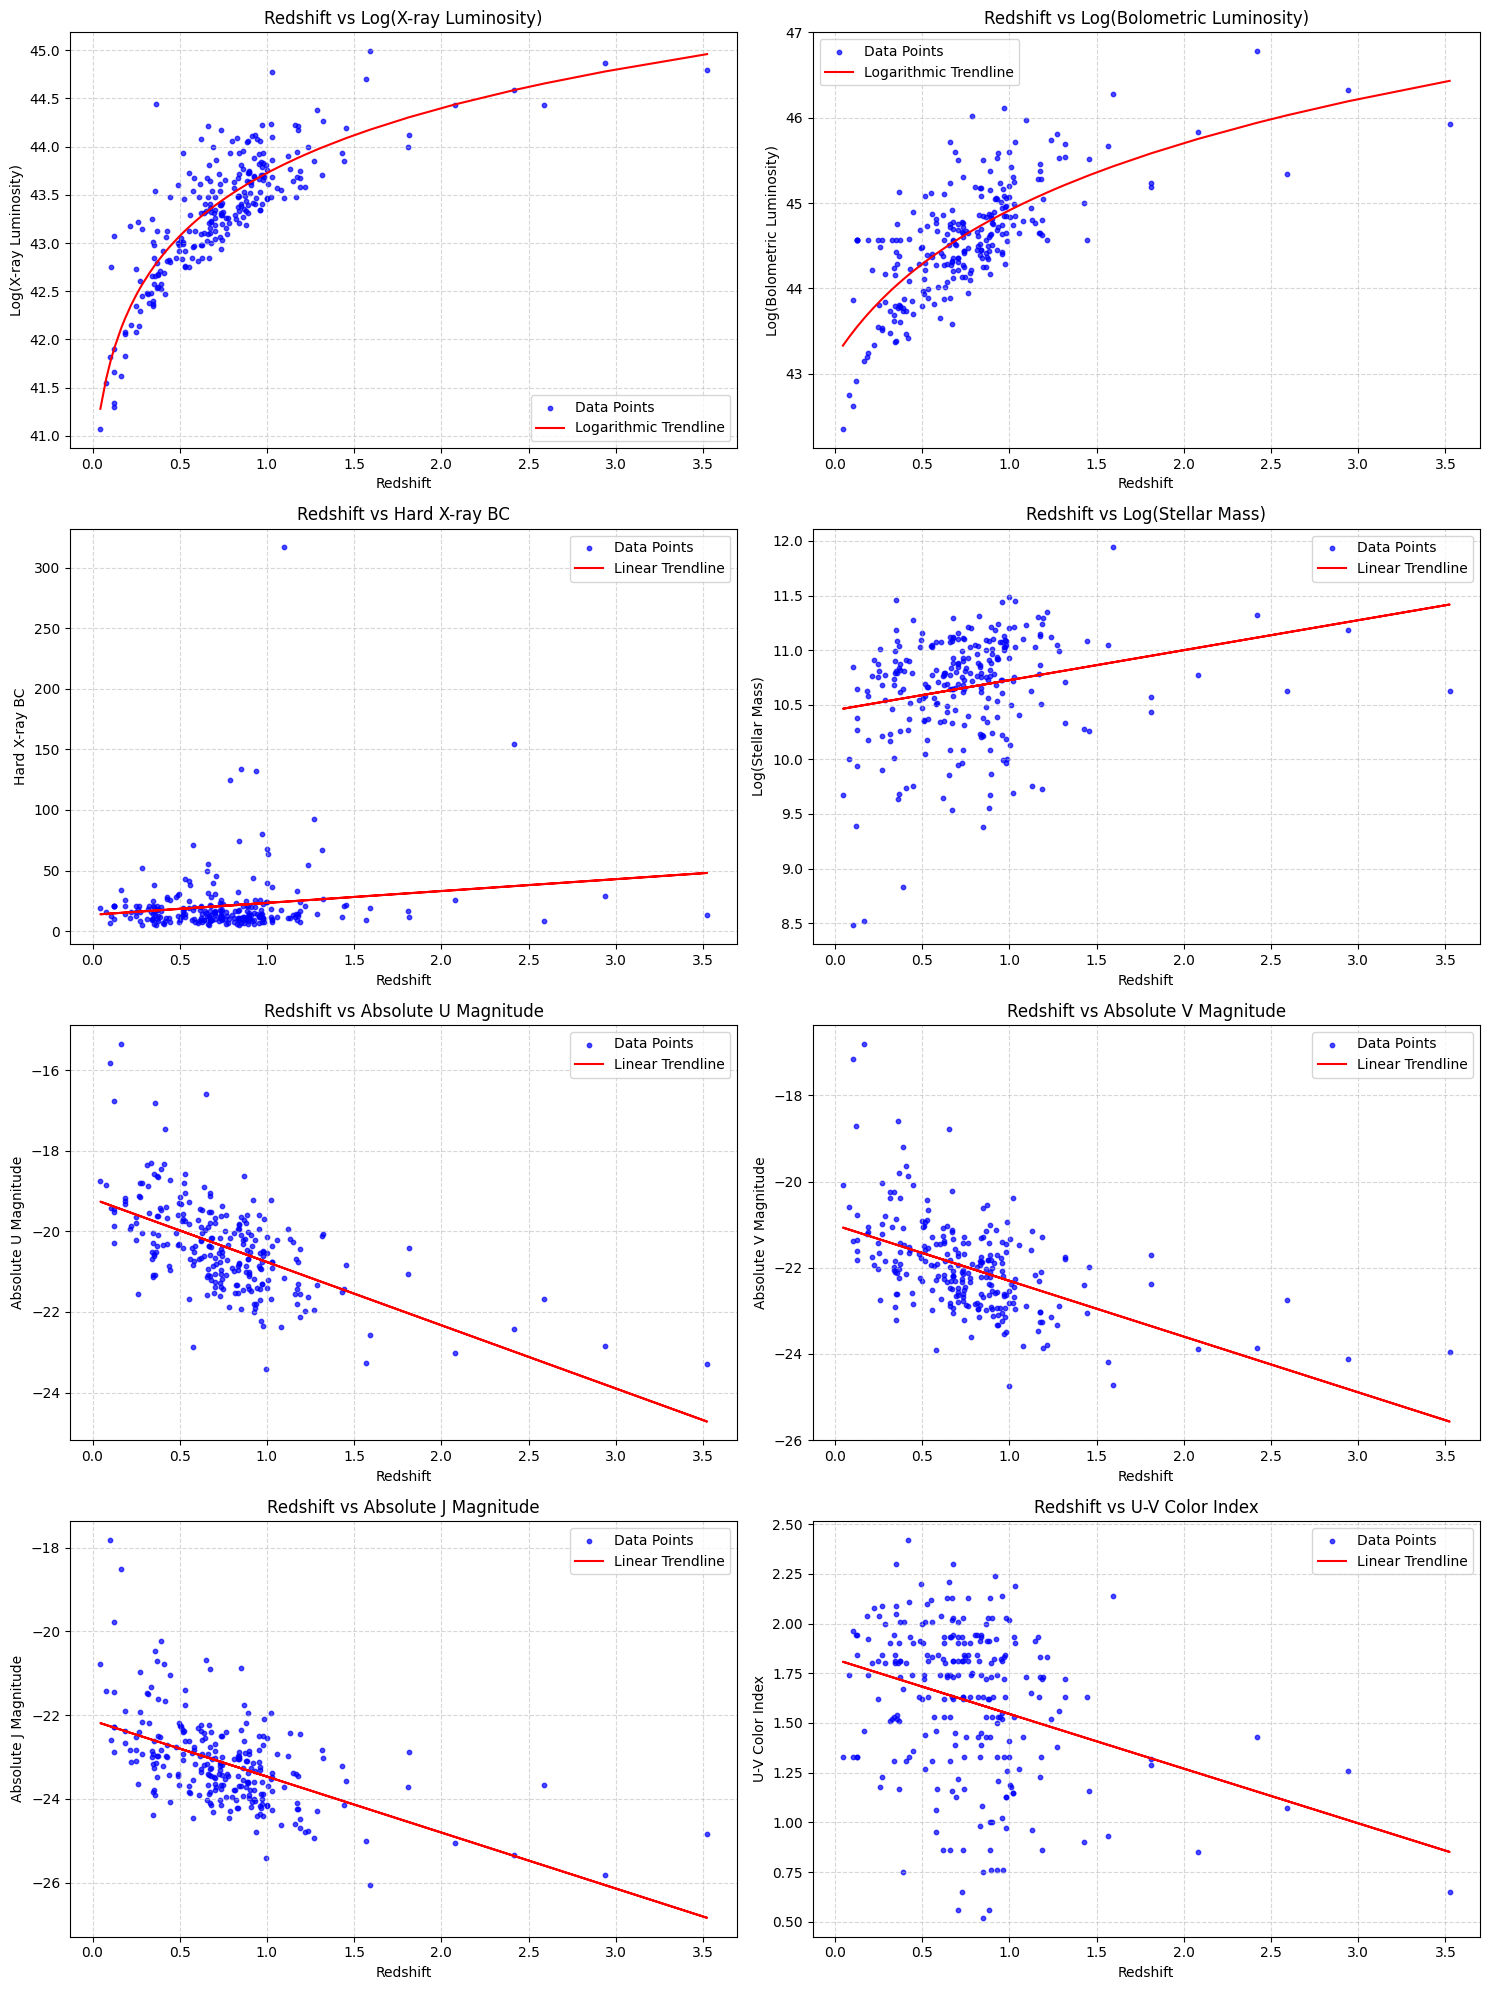

In [65]:
def log_func(x, a, b, c):
    return a * np.log(b * x + 1) + c

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(features):
    x = df['redshift']
    y = df[feature]

    axes[i].scatter(x, y, alpha=0.7, s=10, label='Data Points', color='blue')

    if feature in ['log_lx', 'log_l_bol']:
        try:
            params, _ = curve_fit(log_func, x, y, maxfev=10000)
            y_log = log_func(np.sort(x), *params)
            axes[i].plot(np.sort(x), y_log, color='red', label='Logarithmic Trendline')
        except RuntimeError:
            axes[i].text(0.5, 0.5, "Fit failed", fontsize=12, color="red", transform=axes[i].transAxes)
    else:
        m, b = np.polyfit(x, y, 1)
        axes[i].plot(x, m * x + b, color='red', label='Linear Trendline')

    #
    axes[i].set_xlabel('Redshift')
    axes[i].set_ylabel(labels[feature])
    axes[i].set_title(f'Redshift vs {labels[feature]}')
    axes[i].grid(True, linestyle='--', alpha=0.5)
    axes[i].legend()

plt.tight_layout()

output_image_path = "redshift_vs_features_logarithmic_linear.png"
plt.savefig(output_image_path)
plt.show()


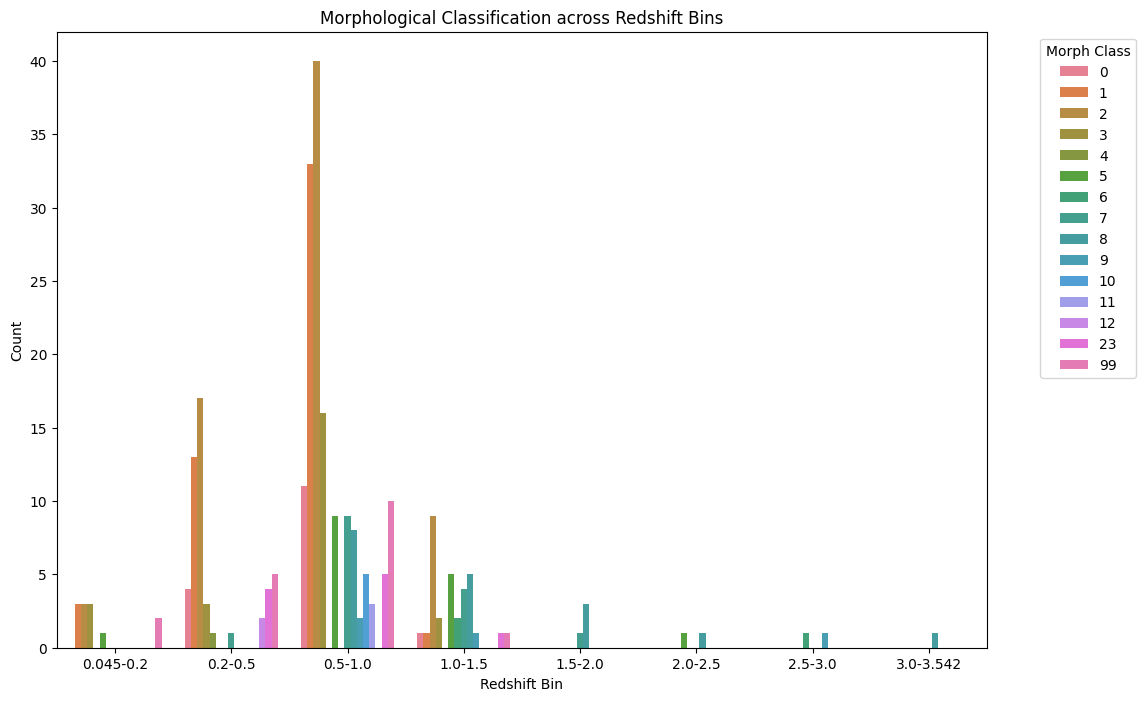

In [33]:
df['morph_class'] = df['morph_class'].astype('category')

# Create the plot
plt.figure(figsize=(12, 8))
sns.countplot(x='Redshift_Bin', hue='morph_class', data=df)
plt.title('Morphological Classification across Redshift Bins')
plt.xlabel('Redshift Bin')
plt.ylabel('Count')
plt.legend(title='Morph Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [52]:
# Define redshift bins
bins = [0.045, 0.2, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.542]
labels = ['0.045-0.2', '0.2-0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0', '2.0-2.5', '2.5-3.0', '3.0-3.542']

# Create a new column for redshift bins
df['Redshift_Bin'] = pd.cut(df['redshift'], bins=bins, labels=labels)


count_data = df.groupby(['Redshift_Bin', 'morph_class']).size().reset_index(name='Count')
total_counts = df.groupby('Redshift_Bin').size().reset_index(name='Total_Count')
normalized_data = pd.merge(count_data, total_counts, on='Redshift_Bin')
normalized_data['Normalized_Count'] = normalized_data['Count'] / normalized_data['Total_Count']


<ipython-input-52-29c6681eab75>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby(['Redshift_Bin', 'morph_class']).size().reset_index(name='Count')
<ipython-input-52-29c6681eab75>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df.groupby('Redshift_Bin').size().reset_index(name='Total_Count')


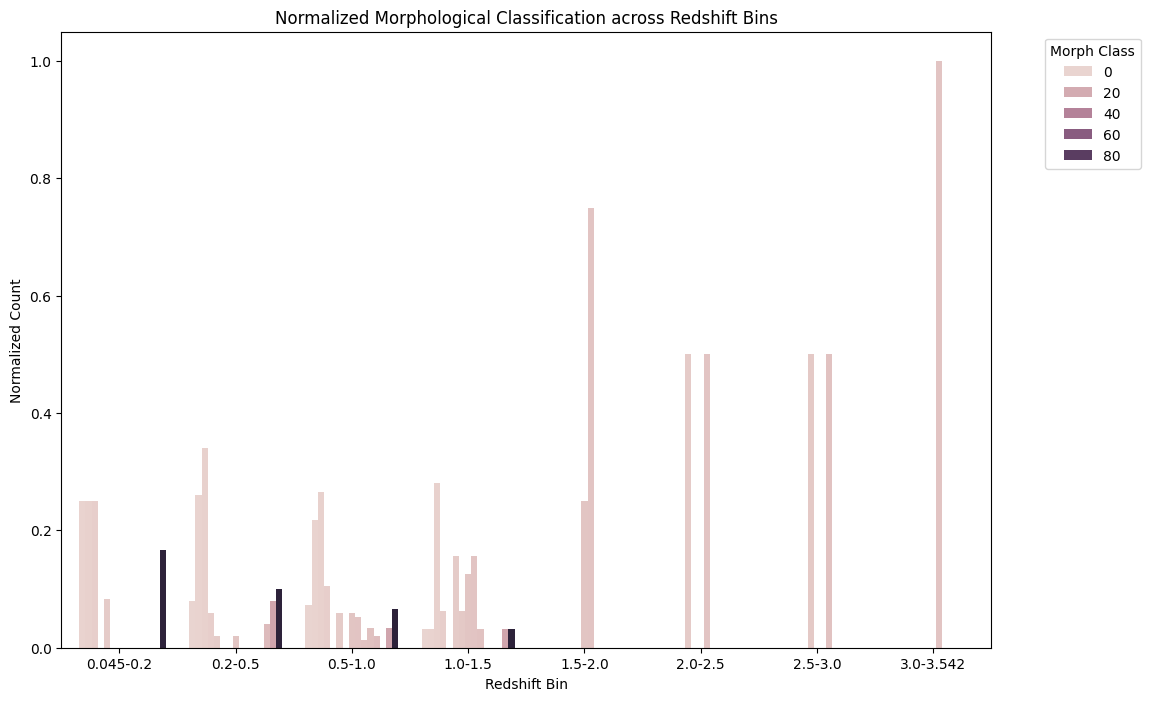

In [34]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Redshift_Bin', y='Normalized_Count', hue='morph_class', data=normalized_data)
plt.title('Normalized Morphological Classification across Redshift Bins')
plt.xlabel('Redshift Bin')
plt.ylabel('Normalized Count')
plt.legend(title='Morph Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [35]:
df.corr(numeric_only=True)

,ra,dec,lii,bii,redshift,log_lx,log_l_bol,hardxray_bc,log_stellar_mass,sfr,abs_umag,abs_vmag,abs_jmag,M-Combined,U-V
ra,1.000000,-0.129567,0.644795,0.786021,0.006980,-0.016305,-0.061989,-0.094692,0.014832,-0.018288,-0.058708,-0.052464,-0.023448,-0.032916,-0.029248
dec,-0.129567,1.000000,-0.841448,0.511138,0.079668,-0.056247,-0.026137,0.028562,-0.142162,0.084388,-0.006230,0.061404,0.073343,0.065287,-0.192000
lii,0.644795,-0.841448,1.000000,0.034310,-0.057512,0.034538,-0.013359,-0.073445,0.117757,-0.074921,-0.027412,-0.076078,-0.069497,-0.068442,0.131834
bii,0.786021,0.511138,0.034310,1.000000,0.055751,-0.049193,-0.070045,-0.064245,-0.075982,0.036873,-0.054806,-0.007173,0.025388,0.012165,-0.145213
redshift,0.006980,0.079668,-0.057512,0.055751,1.000000,0.756398,0.686984,0.153649,0.238749,0.547670,-0.577991,-0.510242,-0.533584,-0.539169,-0.305651
log_lx,-0.016305,-0.056247,0.034538,-0.049193,0.756398,1.000000,0.815255,0.074777,0.400857,0.343759,-0.597995,-0.581193,-0.632496,-0.627347,-0.165916
log_l_bol,-0.061989,-0.026137,-0.013359,-0.070045,0.686984,0.815255,1.000000,0.421329,0.418932,0.442698,-0.619588,-0.596561,-0.660029,-0.654189,-0.187754
hardxray_bc,-0.094692,0.028562,-0.073445,-0.064245,0.153649,0.074777,0.421329,1.000000,0.106789,0.242917,-0.139726,-0.125429,-0.155179,-0.153816,-0.068020
log_stellar_mass,0.014832,-0.142162,0.117757,-0.075982,0.238749,0.400857,0.418932,0.106789,1.000000,0.053493,-0.604315,-0.819642,-0.855858,-0.837896,0.487567
sfr,-0.018288,0.084388,-0.074921,0.036873,0.547670,0.343759,0.442698,0.242917,0.053493,1.000000,-0.318675,-0.246807,-0.324133,-0.313198,-0.265871


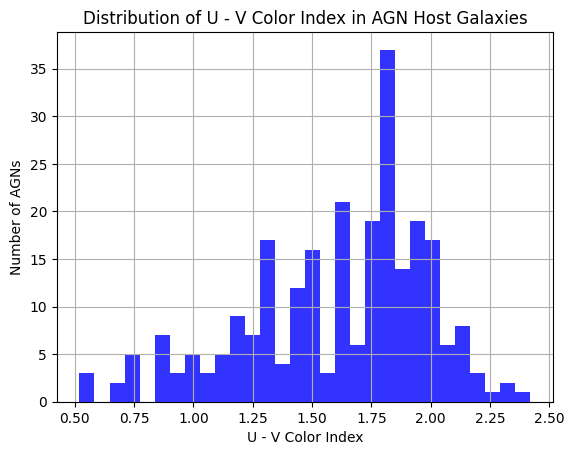

In [36]:
plt.hist(df["U-V"], bins=30, color='blue', alpha=0.8)
plt.xlabel('U - V Color Index')
plt.ylabel('Number of AGNs')
plt.title('Distribution of U - V Color Index in AGN Host Galaxies')
plt.grid(True)
plt.show()

In [37]:
df.head()

,alt_name,name,ra,dec,lii,bii,redshift,log_lx,log_l_bol,hardxray_bc,log_stellar_mass,sfr,abs_umag,abs_vmag,abs_jmag,morph_class,M-Combined,U-V,Redshift_Bin
0,XMMC 2050,XMMU J100015.3+013146,150.06402,1.529659,237.516675,41.682190,1.031,44.77,45.72,8.89,11.45,0.00,-20.77,-22.96,-24.28,99,-56.630833,2.19,1.0-1.5
1,XMMC 5500,XMMU J095849.0+013219,149.70425,1.538820,237.225342,41.396053,0.364,44.44,45.13,4.86,10.84,5.60,-20.51,-22.02,-23.15,99,-54.218336,1.51,0.2-0.5
2,XMMC 2668,XMMU J100059.4+013232,150.24772,1.542418,237.647480,41.838279,0.886,44.05,45.37,20.74,10.76,0.42,-19.58,-21.71,-23.10,99,-53.878212,2.13,0.5-1.0
3,XMMC 60183,XMMU J100026.6+013235,150.11115,1.543309,237.538922,41.728343,0.285,42.45,44.17,52.31,10.77,0.74,-20.04,-21.84,-22.92,99,-53.687375,1.80,0.2-0.5
4,XMMC 2544,XMMU J100055.4+013416,150.23109,1.571185,237.603127,41.841745,0.826,44.09,44.86,5.97,11.31,2.54,-21.34,-23.15,-24.23,99,-56.702639,1.81,0.5-1.0


R² Score: 0.09342269892461608


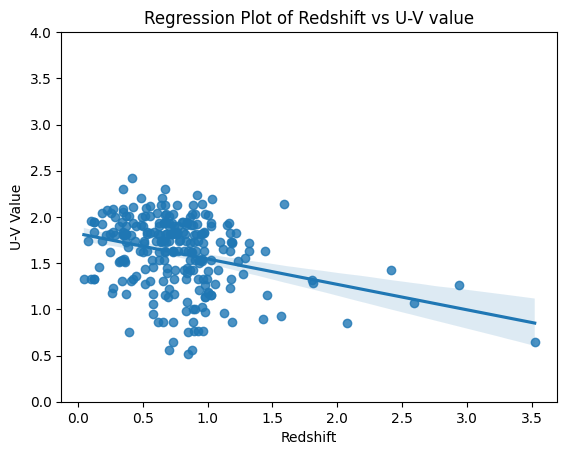

In [38]:
# Bolometric luminosity
sns.regplot(x="redshift", y="U-V", data=df)
plt.xlabel("Redshift")
plt.ylabel("U-V Value")
plt.ylim(0,4)
plt.title("Regression Plot of Redshift vs U-V value")

# Fit a linear regression model
X = df[["redshift"]].values.reshape(-1, 1)  # Reshape for sklearn
y = df["U-V"].values
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate and print the R² value
r2 = r2_score(y, y_pred)
print(f'R² Score: {r2}')
# Show the plot
plt.show()

In [39]:
df.head()

,alt_name,name,ra,dec,lii,bii,redshift,log_lx,log_l_bol,hardxray_bc,log_stellar_mass,sfr,abs_umag,abs_vmag,abs_jmag,morph_class,M-Combined,U-V,Redshift_Bin
0,XMMC 2050,XMMU J100015.3+013146,150.06402,1.529659,237.516675,41.682190,1.031,44.77,45.72,8.89,11.45,0.00,-20.77,-22.96,-24.28,99,-56.630833,2.19,1.0-1.5
1,XMMC 5500,XMMU J095849.0+013219,149.70425,1.538820,237.225342,41.396053,0.364,44.44,45.13,4.86,10.84,5.60,-20.51,-22.02,-23.15,99,-54.218336,1.51,0.2-0.5
2,XMMC 2668,XMMU J100059.4+013232,150.24772,1.542418,237.647480,41.838279,0.886,44.05,45.37,20.74,10.76,0.42,-19.58,-21.71,-23.10,99,-53.878212,2.13,0.5-1.0
3,XMMC 60183,XMMU J100026.6+013235,150.11115,1.543309,237.538922,41.728343,0.285,42.45,44.17,52.31,10.77,0.74,-20.04,-21.84,-22.92,99,-53.687375,1.80,0.2-0.5
4,XMMC 2544,XMMU J100055.4+013416,150.23109,1.571185,237.603127,41.841745,0.826,44.09,44.86,5.97,11.31,2.54,-21.34,-23.15,-24.23,99,-56.702639,1.81,0.5-1.0


In [40]:
pearson_corr, pearson_p_value = stats.pearsonr(df['redshift'], df['U-V'])
spearman_corr, spearman_p_value = stats.spearmanr(df['redshift'], df['U-V'])
print(f"Pearson Correlation: {pearson_corr:.4f}, p-value: {pearson_p_value:.4f}")
print(f"Spearman Correlation: {spearman_corr:.4f}, p-value: {spearman_p_value:.4f}")

Pearson Correlation: -0.3057, p-value: 0.0000
Spearman Correlation: -0.2715, p-value: 0.0000


In [41]:
pearson_corr, pearson_p_value = stats.pearsonr(df['redshift'], df['sfr'])
spearman_corr, spearman_p_value = stats.spearmanr(df['redshift'], df['sfr'])
print(f"Pearson Correlation: {pearson_corr:.4f}, p-value: {pearson_p_value:.4f}")
print(f"Spearman Correlation: {spearman_corr:.4f}, p-value: {spearman_p_value:.4f}")

Pearson Correlation: 0.5477, p-value: 0.0000
Spearman Correlation: 0.5307, p-value: 0.0000


In [42]:


# List to store the results (equivalent to vector of pairs in C++)
pearson_correlations = []

# Calculate Pearson correlation for each numeric column with 'redshift'
for column in df.columns:
    if column != 'redshift' and column !="ra" and column != "dec"and pd.api.types.is_numeric_dtype(df[column]):  # Check if the column is numeric
        # Drop rows with missing values for the specific columns
        clean_data = df[['redshift', column]].dropna()
        if len(clean_data) > 1:  # Ensure there are enough data points
            # Calculate Pearson correlation
            corr_value, _ = stats.pearsonr(clean_data['redshift'], clean_data[column])
            # Append the result as a tuple
            pearson_correlations.append((column, corr_value))

# Output the list of tuples


In [43]:
print(pearson_correlations)

[('lii', -0.057512367510704994), ('bii', 0.05575058933880216), ('log_lx', 0.7563977470951727), ('log_l_bol', 0.6869841542511189), ('hardxray_bc', 0.15364905166132875), ('log_stellar_mass', 0.23874948189777515), ('sfr', 0.5476703461668223), ('abs_umag', -0.5779907001417781), ('abs_vmag', -0.5102417453538797), ('abs_jmag', -0.533583815911217), ('M-Combined', -0.5391691309785489), ('U-V', -0.30565127011778687)]


In [44]:

spearman_correlations = []

# Calculate Pearson correlation for each numeric column with 'redshift'
for column in df.columns:
    if column != 'redshift' and pd.api.types.is_numeric_dtype(df[column]):  # Check if the column is numeric
        # Drop rows with missing values for the specific columns
        clean_data = df[['redshift', column]].dropna()
        if len(clean_data) > 1:  # Ensure there are enough data points
            # Calculate Spearman correlation
            corr_value, _ = stats.spearmanr(clean_data['redshift'], clean_data[column])
            # Append the result as a tuple
            spearman_correlations.append((column, corr_value))

# Output the list of tuples


In [45]:
print(spearman_correlations)

[('ra', 0.028432463807786627), ('dec', 0.04107695469951137), ('lii', -0.01720212368745702), ('bii', 0.03973047183862055), ('log_lx', 0.8083841280042177), ('log_l_bol', 0.6948289321344655), ('hardxray_bc', 0.0269069210898719), ('log_stellar_mass', 0.2546245839250001), ('sfr', 0.530693039629628), ('abs_umag', -0.5817724547535431), ('abs_vmag', -0.5141404347559879), ('abs_jmag', -0.5332941790308575), ('M-Combined', -0.5394377267259363), ('U-V', -0.2715417304897909)]


#### Creating the Gaussian Processes

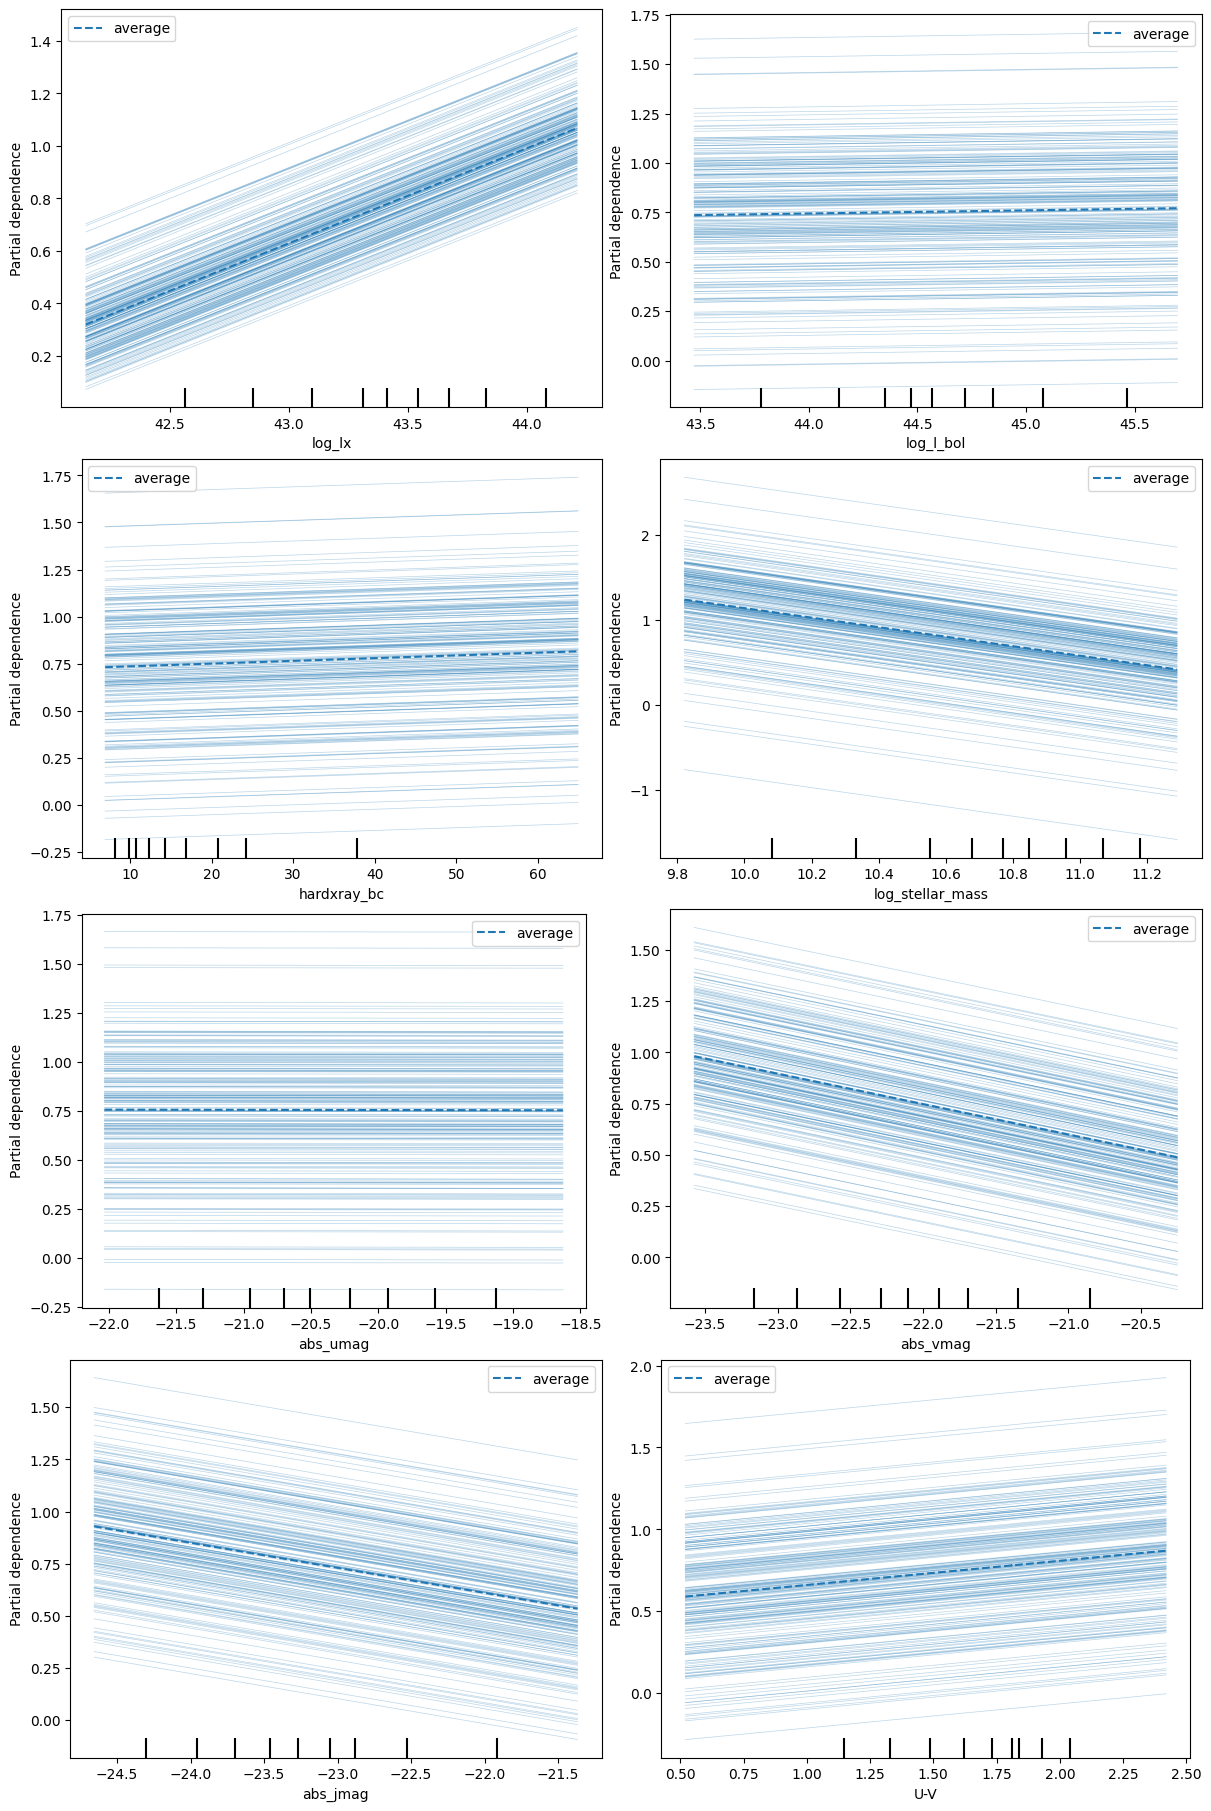

Mean Squared Error (MSE): 0.09379755876035692
R² Score: 0.6583193397102602
            Feature  Coefficient  Absolute Coefficient
3  log_stellar_mass    -0.571046              0.571046
0            log_lx     0.364401              0.364401
7               U-V     0.155891              0.155891
5          abs_vmag    -0.155302              0.155302
6          abs_jmag    -0.118197              0.118197
1         log_l_bol     0.017836              0.017836
2       hardxray_bc     0.001443              0.001443
4          abs_umag     0.000589              0.000589


In [46]:


#Define features and target variable
features = ['log_lx', 'log_l_bol', 'hardxray_bc', 'log_stellar_mass', 'abs_umag', 'abs_vmag', 'abs_jmag', 'U-V']
X = df[features]
y = df['redshift']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define kernel
kernel = DP() + WK()

# Create Gaussian Process Regressor model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit model to training data
gp.fit(X_train, y_train)

# Plot Partial Dependence
fig, ax = plt.subplots(4, 2, figsize=(12, 18), constrained_layout=True)  # Adjust grid size for 4x2
for i, feature in enumerate(features):
    row, col = divmod(i, 2)  # Arrange in a 4x2 grid
    PartialDependenceDisplay.from_estimator(gp, X_train, [feature], kind='both', ax=ax[row, col])

plt.show()

# Make predictions and calculate uncertainty
y_pred, sigma = gp.predict(X_test, return_std=True)

# Evaluate model accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Train a linear regression model for feature importance
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Extract coefficients to determine feature importance
coefficients = linear_model.coef_
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

# Display sorted features by importance
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)
print(feature_importance)


# Define your features and target



<ipython-input-47-b07f111de649>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='Blues_d')


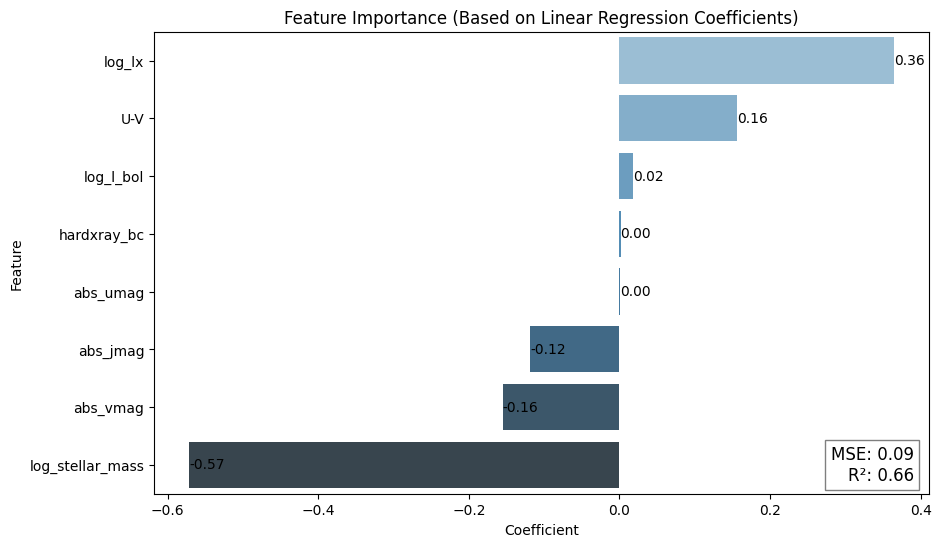

In [47]:
features = ['log_lx', 'log_l_bol', 'hardxray_bc', 'log_stellar_mass', 'abs_umag', 'abs_vmag', 'abs_jmag', 'U-V']
X = df[features]
y = df['redshift']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define kernel
kernel = DP() + WK()

# Create Gaussian Process Regressor model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit model to training data
gp.fit(X_train, y_train)

# Make predictions and calculate uncertainty
y_pred, sigma = gp.predict(X_test, return_std=True)

# Evaluate model accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Train a linear regression model for feature importance
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Extract coefficients to determine feature importance
coefficients = linear_model.coef_
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

# Sort features by coefficients
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Plot feature importance with actual values next to bars
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='Blues_d')
plt.title('Feature Importance (Based on Linear Regression Coefficients)')

# Add value labels to the bars
for index, value in enumerate(feature_importance['Coefficient']):
    ax.text(value, index, f'{value:.2f}', color='black', va="center")

# Add MSE and R² to the bottom-right corner of the plot
plt.text(0.98, 0.02, f'MSE: {mse:.2f}\nR²: {r2:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5))

plt.show()


In [48]:
df.head()

,alt_name,name,ra,dec,lii,bii,redshift,log_lx,log_l_bol,hardxray_bc,log_stellar_mass,sfr,abs_umag,abs_vmag,abs_jmag,morph_class,M-Combined,U-V,Redshift_Bin
0,XMMC 2050,XMMU J100015.3+013146,150.06402,1.529659,237.516675,41.682190,1.031,44.77,45.72,8.89,11.45,0.00,-20.77,-22.96,-24.28,99,-56.630833,2.19,1.0-1.5
1,XMMC 5500,XMMU J095849.0+013219,149.70425,1.538820,237.225342,41.396053,0.364,44.44,45.13,4.86,10.84,5.60,-20.51,-22.02,-23.15,99,-54.218336,1.51,0.2-0.5
2,XMMC 2668,XMMU J100059.4+013232,150.24772,1.542418,237.647480,41.838279,0.886,44.05,45.37,20.74,10.76,0.42,-19.58,-21.71,-23.10,99,-53.878212,2.13,0.5-1.0
3,XMMC 60183,XMMU J100026.6+013235,150.11115,1.543309,237.538922,41.728343,0.285,42.45,44.17,52.31,10.77,0.74,-20.04,-21.84,-22.92,99,-53.687375,1.80,0.2-0.5
4,XMMC 2544,XMMU J100055.4+013416,150.23109,1.571185,237.603127,41.841745,0.826,44.09,44.86,5.97,11.31,2.54,-21.34,-23.15,-24.23,99,-56.702639,1.81,0.5-1.0


##### Analysis with RandomForest Classifier

Mean Squared Error: 0.07511685219607826
R-squared: 0.7263684045038237


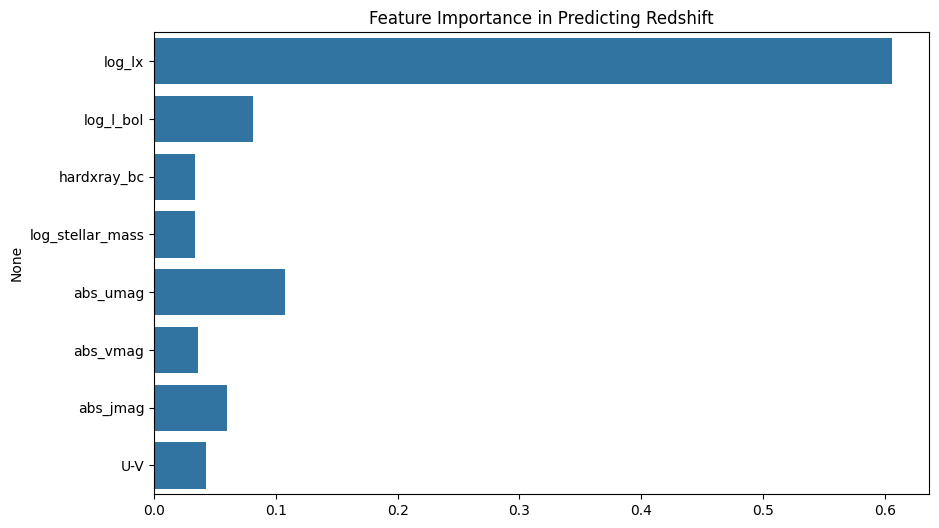

In [49]:
#https://chatgpt.com/share/66ef65be-2db0-8013-969f-f27d1a87b9cc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Feature importance
importances = rf_regressor.feature_importances_
feature_names = X.columns

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Predicting Redshift")
plt.show()


##### LightGBM prediction graph

Mean Squared Error: 0.06996729273007643
R-squared: 0.6654439276144601


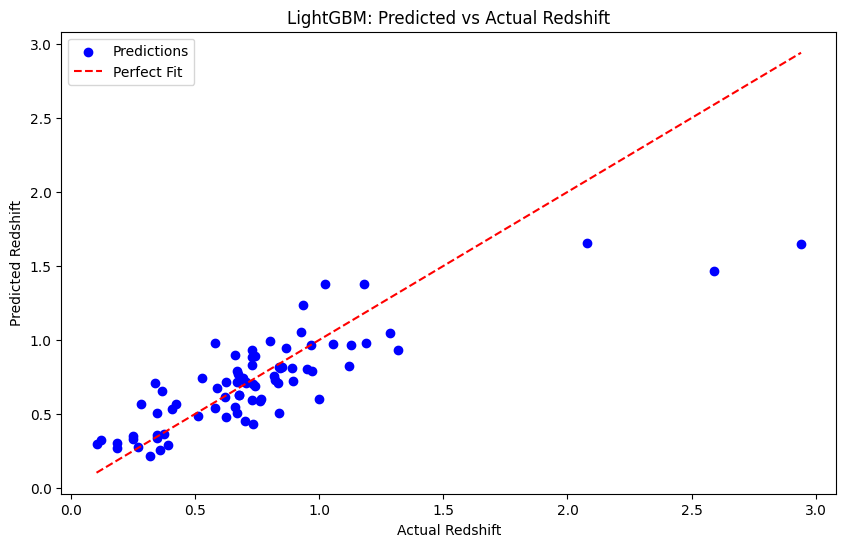

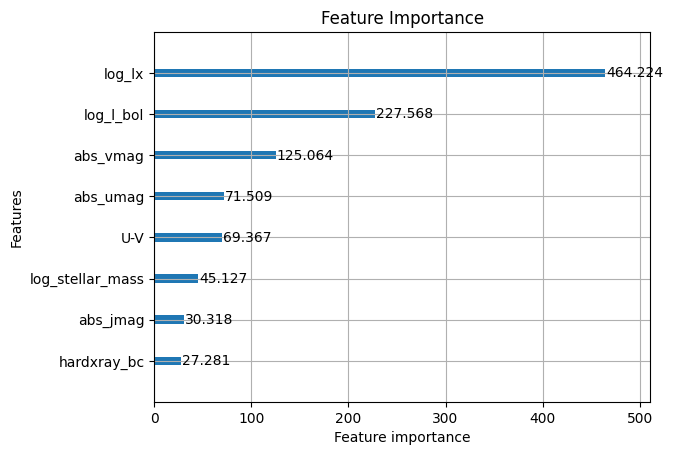

In [50]:
LightGBM_features = ['log_lx', 'log_l_bol', 'hardxray_bc', 'log_stellar_mass', 'abs_umag', 'abs_vmag', 'abs_jmag',"U-V"]
x = df[LightGBM_features].dropna()
y = df['redshift'].loc[x.index]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a LightGBM dataset from training data
train_data = lgb.Dataset(X_train, label=y_train)

# Define LightGBM parameters (these can be tuned)
params = {
    'objective': 'regression',   # For regression tasks
    'metric': 'rmse',            # Root Mean Squared Error, gives better insight into prediction errors
    'boosting_type': 'gbdt',     # Gradient boosting decision tree
    'learning_rate': 0.01,       # Lower learning rate for gradual learning (tune it between 0.01 to 0.05)
    'num_leaves': 50,            # More leaves help capture complex relationships, but not too high to overfit
    'max_depth': 10,             # Control the tree depth to avoid overfitting (experiment with values 6-12)
    'min_data_in_leaf': 20,      # Minimum data points in a leaf (regularization, higher value reduces overfitting)
    'feature_fraction': 0.8,     # Fraction of features to be used in each iteration (controls overfitting)
    'bagging_fraction': 0.8,     # Fraction of data to be used in each iteration (similar to dropout)
    'bagging_freq': 5,           # Perform bagging every 5 iterations
    'lambda_l1': 0.1,            # L1 regularization to improve generalization
    'lambda_l2': 0.2,            # L2 regularization to prevent overfitting
    'verbosity': -1,             # Suppress logs
    'seed': 42                   # Ensures reproducibility
}


# Train the LightGBM model
lgb_model = lgb.train(params, train_data, num_boost_round=1000)

# Make predictions on the test data
y_pred = lgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot predictions vs actual redshift values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title("LightGBM: Predicted vs Actual Redshift")
plt.xlabel("Actual Redshift")
plt.ylabel("Predicted Redshift")
plt.legend()
plt.show()

# Feature Importance
lgb.plot_importance(lgb_model, max_num_features=10, importance_type='gain', title="Feature Importance")
plt.show()


##### Using Lasso Regression

Mean Squared Error: 0.0935588211688349
R-squared: 0.6591890000616093
            Feature  Coefficient
0            log_lx     0.364361
1         log_l_bol     0.017712
2       hardxray_bc     0.001436
3  log_stellar_mass    -0.556466
4          abs_umag    -0.035378
5          abs_vmag    -0.115275
6          abs_jmag    -0.116652
7               U-V     0.182019


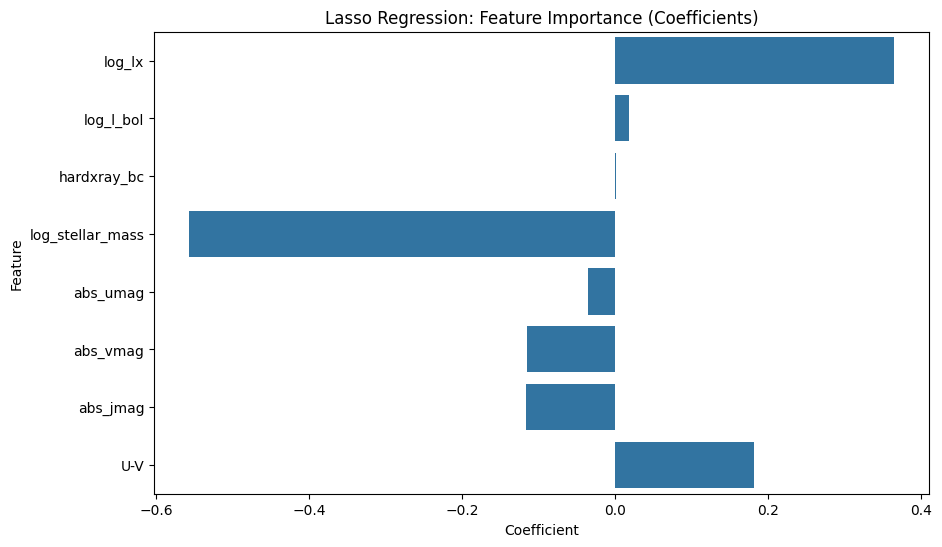

In [51]:
Lasso_Regression_features = ['log_lx', 'log_l_bol', 'hardxray_bc', 'log_stellar_mass', 'sfr', 'abs_umag', 'abs_vmag', 'abs_jmag',"U-V"]
x = df[Lasso_Regression_features].dropna()
y = df['redshift'].loc[x.index]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso model with a regularization parameter alpha (tune alpha for better results)
lasso = Lasso(alpha=0.00010)  # You can try different values for alpha

# Train the model
lasso.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Coefficients and feature importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})

# Display the coefficients
print(coefficients)

# Plot the coefficients (feature importance)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title("Lasso Regression: Feature Importance (Coefficients)")
plt.show()
